In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!conda install -y gdown
!gdown --id 1GItQZtqxf4v6szP_Tf3gcM0taib0F1SH

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    filelock-3.8.2             |     pyhd8ed1ab_0          14 KB  conda-forge
    gdown-4.6.0                |     pyhd8ed1ab_0          18 KB  conda-forge
    openssl-1.1.1s             |       h0b41bf4_1         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages

In [29]:
df = pd.read_csv('out.csv')

In [30]:
def freq_words_removal(text, lst_words):
    lst_text = text.split()
    if lst_words is not None:
        lst_text = [word for word in lst_text if word not in lst_words]
    text = " ".join(lst_text)
    return text

In [31]:
wrds = ['مع','لا','على','من','ما','في','الي','هو','انا','أنا','اله']
df["tweet_clean"] = df["tweet"].apply(lambda x: freq_words_removal(x, wrds))

In [32]:
df.head(5)

,tweet,country,tweet_clean
0,اكيد دخلت تخلصه بنفسك ياستاذ من سنوات كنت مستع...,EG,اكيد دخلت تخلصه بنفسك ياستاذ سنوات كنت مستعجل ...
1,ادعمالسيسىبيتشعر يالي دفنت الإخوان جوه الجحور ...,EG,ادعمالسيسىبيتشعر يالي دفنت الإخوان جوه الجحور ...
2,عندي سؤال فضولي دايما هي الناس لي بتدخل تدافع ...,EG,عندي سؤال فضولي دايما هي الناس لي بتدخل تدافع ...
3,حضرتك دى مش بتقال غير لاهلى مش اى فريق خلاص,EG,حضرتك دى مش بتقال غير لاهلى مش اى فريق خلاص
4,وبدل ما تحاسبه روح حاسب حكامك يا حمش,EG,وبدل تحاسبه روح حاسب حكامك يا حمش


In [33]:
#Shuffle the dataset
df = df.reindex(np.random.permutation(df.index))
df['LABEL'] = 0

In [34]:
df

,tweet,country,tweet_clean,LABEL
302131,كان جاو عباد راهم استحفظوا على يسارهم واتفاهمو...,TN,كان جاو عباد راهم استحفظوا يسارهم واتفاهموا وا...,0
193070,انا من سنة حولت على فيفا مع اني من المتعصبين ل...,AE,سنة حولت فيفا اني المتعصبين لكن كونامي سيء الى...,0
88604,يمكن ما في شي بضحك عم بحكي جد,LB,يمكن شي بضحك عم بحكي جد,0
323840,مع انك اغلى ما عندي انا منك وعنك تب,YE,انك اغلى عندي منك وعنك تب,0
94823,حطيلي لايك بين الحين والاخر حتى اعلم انك بخير,LB,حطيلي لايك بين الحين والاخر حتى اعلم انك بخير,0
...,...,...,...,...
93637,كنت عم بمزح معك مين قلك انا زهقان,LB,كنت عم بمزح معك مين قلك زهقان,0
265696,راه ديجا انسالخنا من الحوايج الجوهرية دابا عاد...,MA,راه ديجا انسالخنا الحوايج الجوهرية دابا عاد دز...,0
109760,الفرق بين مونتيلا جاتوزو,LY,الفرق بين مونتيلا جاتوزو,0
316920,واله نفس الملاحظة ياقديم الاخبار بتلقاها متباي...,SD,واله نفس الملاحظة ياقديم الاخبار بتلقاها متباي...,0


In [35]:
from keras.utils.np_utils import to_categorical


#One-hot encode the lab
df.loc[df['country'] == 'SA', 'LABEL'] = 0
df.loc[df['country'] == 'QA', 'LABEL'] = 1
df.loc[df['country'] == 'KW', 'LABEL'] = 2
df.loc[df['country'] == 'AE', 'LABEL'] = 3
df.loc[df['country'] == 'OM', 'LABEL'] = 4
df.loc[df['country'] == 'JO', 'LABEL'] = 5
df.loc[df['country'] == 'PL', 'LABEL'] = 6
df.loc[df['country'] == 'BH', 'LABEL'] = 7
df.loc[df['country'] == 'LY', 'LABEL'] = 8
df.loc[df['country'] == 'EG', 'LABEL'] = 9
df.loc[df['country'] == 'SD', 'LABEL'] = 10
df.loc[df['country'] == 'IQ', 'LABEL'] = 11
df.loc[df['country'] == 'LB', 'LABEL'] = 12
df.loc[df['country'] == 'SY', 'LABEL'] = 13
df.loc[df['country'] == 'TN', 'LABEL'] = 14
df.loc[df['country'] == 'DZ', 'LABEL'] = 15
df.loc[df['country'] == 'MA', 'LABEL'] = 16
df.loc[df['country'] == 'YE', 'LABEL'] = 17
print(df['LABEL'][:10])
labels = to_categorical(df['LABEL'], num_classes=18)
print(labels[:10])
if 'country' in df.keys():
    df.drop(['country'], axis=1)

302131    14
193070     3
88604     12
323840    17
94823     12
159202    15
30409     13
38306     13
182224     3
220833     0
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [36]:
df.head(10)

,tweet,country,tweet_clean,LABEL
302131,كان جاو عباد راهم استحفظوا على يسارهم واتفاهمو...,TN,كان جاو عباد راهم استحفظوا يسارهم واتفاهموا وا...,14
193070,انا من سنة حولت على فيفا مع اني من المتعصبين ل...,AE,سنة حولت فيفا اني المتعصبين لكن كونامي سيء الى...,3
88604,يمكن ما في شي بضحك عم بحكي جد,LB,يمكن شي بضحك عم بحكي جد,12
323840,مع انك اغلى ما عندي انا منك وعنك تب,YE,انك اغلى عندي منك وعنك تب,17
94823,حطيلي لايك بين الحين والاخر حتى اعلم انك بخير,LB,حطيلي لايك بين الحين والاخر حتى اعلم انك بخير,12
159202,انجينيورا ما كانش,DZ,انجينيورا كانش,15
30409,هو بكل سنة بنفس هالفترة بنبسط انو خلصت من ام ا...,SY,بكل سنة بنفس هالفترة بنبسط انو خلصت ام الثاني عشر,13
38306,لا قصدي أملاك الدولة,SY,قصدي أملاك الدولة,13
182224,كيف شخص يتابعه بالارقام مئات الآلاف والي يتفاع...,AE,كيف شخص يتابعه بالارقام مئات الآلاف والي يتفاع...,3
220833,صف مع خوياك صديقي القديم,SA,صف خوياك صديقي القديم,0


In [37]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

n_most_common_words = 20000
max_len = 250
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['tweet_clean'].values)
sequences = tokenizer.texts_to_sequences(df['tweet_clean'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 342846 unique tokens.


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.1, random_state=42)

In [39]:
epochs = 30
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

In [40]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping



print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(18, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())


((298834, 250), (298834, 18), (33204, 250), (33204, 18))
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 128)          2560000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 250, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 18)                1170      
                                                                 
Total params: 2,610,578
Trainable params: 2,610,578
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=6, min_delta=0.0001)])

Epoch 1/30
934/934 [==============================] - 2022s 2s/step - loss: 2.4768 - acc: 0.1914 - val_loss: 2.0411 - val_acc: 0.3321
Epoch 2/30
934/934 [==============================] - 2035s 2s/step - loss: 2.0826 - acc: 0.3154 - val_loss: 1.8617 - val_acc: 0.4008
Epoch 3/30
934/934 [==============================] - 2040s 2s/step - loss: 1.9309 - acc: 0.3721 - val_loss: 1.7821 - val_acc: 0.4244
Epoch 4/30
934/934 [==============================] - 2010s 2s/step - loss: 1.8389 - acc: 0.4079 - val_loss: 1.7213 - val_acc: 0.4532
Epoch 5/30
934/934 [==============================] - 2017s 2s/step - loss: 1.7771 - acc: 0.4317 - val_loss: 1.6838 - val_acc: 0.4707
Epoch 6/30
934/934 [==============================] - 2013s 2s/step - loss: 1.7276 - acc: 0.4495 - val_loss: 1.6664 - val_acc: 0.4802
Epoch 7/30
934/934 [==============================] - 2009s 2s/step - loss: 1.6894 - acc: 0.4647 - val_loss: 1.6425 - val_acc: 0.4876
Epoch 8/30
934/934 [==============================] - 2017s 2s

In [42]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1038/1038 [==============================] - 43s 42ms/step - loss: 1.5633 - acc: 0.5308
Test set
  Loss: 1.563
  Accuracy: 0.531


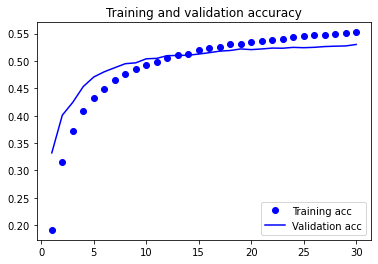

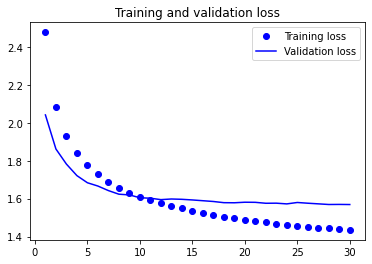

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

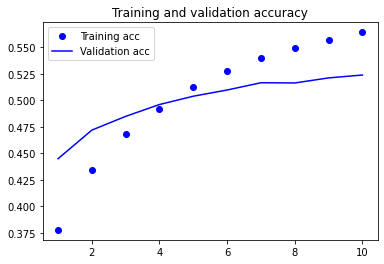

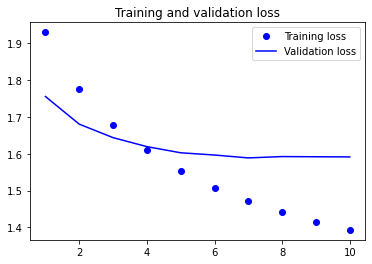

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
txt = ["فيديوات لي كيطلعو ليك فاش كتوصل لباج 987 فالموقع الازرق"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['SA','QA','KW','AE','OM','JO','PL','BH','LY','EG','SD','IQ','LB','SY','TN','DZ','MA','YE']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 59ms/step
[[0.05649181 0.05620588 0.05638416 0.05731249 0.05514055 0.05427251
  0.05541549 0.05613007 0.05591628 0.05493451 0.05479128 0.05695933
  0.0559858  0.05504156 0.05484543 0.05474817 0.05655802 0.05286663]] AE
